<a href="https://colab.research.google.com/github/LKVan/Lab2_ML/blob/van/Lab_5_20130462_LeKhanhVan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with **SVM** to classification tasks and compare its performance with other competitive algorithms. In general, **SVM** is one of the most popular and widely used supervised machine learning algorithms.

*   **Deadline: 23:59, 17/03/2023**



# Import libraries

In [ ]:
# connect drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML_Lab5'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML_Lab5


In [ ]:
# code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from prettytable import PrettyTable
from sklearn.metrics import classification_report

#Task 1. 
For breast cancer dataset (https://tinyurl.com/3vme8hr3) which could be loaded from datasets in sklearn as follows:

```
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()
```

*   1.1.	Apply SVM algorithm to above dataset using linear kernel.
*   1.2.	Compare the obtained results with other competitive algorithms (Logistic Regression, Decision Tree, kNN) based on metrics: accuracy, precision, recall, f1 measures.



In [ ]:
# code
cancer = datasets.load_breast_cancer()
X1 = cancer.data
y1 = cancer.target
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.3, train_size=0.7,
random_state=None, shuffle=True, stratify=None)

[[ 57   3]
 [  4 107]]


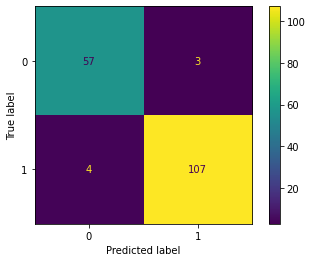

In [ ]:
# 1.1
clf = svm.SVC(kernel='linear')
clf.fit(x_train1,y_train1)
y_pred1 = clf.predict(x_test1)
cm = confusion_matrix(y_test1,y_pred1)
print(cm)
ConfusionMatrixDisplay.from_predictions(y_test1, y_pred1)

accuracy1 = round(metrics.accuracy_score(y_test1,y_pred1),4)
precision1 = round(metrics.precision_score(y_test1,y_pred1,average='macro'),4)
recall1 = round(metrics.recall_score(y_test1,y_pred1,average='macro'),4)
f11 = round(metrics.f1_score(y_test1,y_pred1,average='macro'),4)

In [ ]:
# 1.2
# Logistic Regression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train1, y_train1)

y_pred2 = classifier.predict(x_test1)

accuracy2 = round(metrics.accuracy_score(y_test1,y_pred2),4)
precision2 = round(metrics.precision_score(y_test1,y_pred2,average='macro'),4)
recall2 = round(metrics.recall_score(y_test1,y_pred2,average='macro'),4)
f12 = round(metrics.f1_score(y_test1,y_pred2,average='macro'),4)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# kNN
kNN = KNeighborsClassifier(n_neighbors= 3)
kNN.fit(x_train1,y_train1)
y_pred3 = kNN.predict(x_test1)

accuracy3 = round(metrics.accuracy_score(y_test1,y_pred3),4)
precision3 = round(metrics.precision_score(y_test1,y_pred3,average='macro'),4)
recall3 = round(metrics.recall_score(y_test1,y_pred3,average='macro'),4)
f13 = round(metrics.f1_score(y_test1,y_pred3,average='macro'),4)


In [ ]:
# # Decision tree
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,
max_depth=3, min_samples_leaf=5)
clf_model.fit(x_train1,y_train1)

y_pred4 = clf_model.predict(x_test1)

accuracy4 = round(metrics.accuracy_score(y_test1,y_pred4),4)
precision4 = round(metrics.precision_score(y_test1,y_pred4,average='macro'),4)
recall4 = round(metrics.recall_score(y_test1,y_pred4,average='macro'),4)
f14 = round(metrics.f1_score(y_test1,y_pred4,average='macro'),4)


In [ ]:
# pretty table
t = PrettyTable(['Name', 'Accuraty','Precision','Recall','F1'])
t.add_row(['SVM', accuracy1,precision1,recall1,f11])
t.add_row(['Logictis Registion', accuracy2,precision2,recall2,f12])
t.add_row(['kNN', accuracy3,precision3,recall3,f13])
t.add_row(['Decision Tree', accuracy4,precision4,recall1,f14])
print(t)

+--------------------+----------+-----------+--------+--------+
|        Name        | Accuraty | Precision | Recall |   F1   |
+--------------------+----------+-----------+--------+--------+
|        SVM         |  0.9591  |   0.9536  | 0.957  | 0.9552 |
| Logictis Registion |  0.9474  |   0.9385  | 0.948  | 0.9429 |
|        kNN         |  0.9123  |   0.9026  | 0.9056 | 0.9041 |
|   Decision Tree    |  0.9357  |   0.9382  | 0.957  | 0.9279 |
+--------------------+----------+-----------+--------+--------+


#Task 2. 

*   1.1.	Perform SVM algorithm to **Iris dataset** using **linear kernel**.
*   1.2.	Compare the obtained results in 1.1 with SVM using other kernels (**Polynomial Kernel, Gaussian Kernel, Sigmoid Kernel, Radial Basis Function Kernel**). Some metrics could be used: accuracy, precision, recall, f1 measures





In [ ]:
# code
iris = datasets.load_iris()
X2 = iris.data
y2 = iris.target
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.3, train_size=0.7,
random_state=None, shuffle=True, stratify=None)

In [ ]:
# 2.1
linear = svm.SVC(kernel='linear')
linear.fit(x_train2,y_train2)
y_pred_linear = linear.predict(x_test2)

print(confusion_matrix(y_test2,y_pred_linear))
print(classification_report(y_test2,y_pred_linear))

accuracy_linear = round(metrics.accuracy_score(y_test2,y_pred_linear),4)
precision_linear = round(metrics.precision_score(y_test2,y_pred_linear,average='macro'),4)
recall_linear = round(metrics.recall_score(y_test2,y_pred_linear,average='macro'),4)
f1_linear = round(metrics.f1_score(y_test2,y_pred_linear,average='macro'),4)

[[12  0  0]
 [ 0 14  1]
 [ 0  0 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.97        15
           2       0.95      1.00      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
# 2.2
# Polynomial Kernel
poly = svm.SVC(kernel='poly', degree=3, gamma='scale', coef0=0.0)
poly.fit(x_train2,y_train2)
y_pred_poly = poly.predict(x_test2)

accuracy_poly = round(metrics.accuracy_score(y_test2,y_pred_poly),4)
precision_poly = round(metrics.precision_score(y_test2,y_pred_poly,average='macro'),4)
recall_poly = round(metrics.recall_score(y_test2,y_pred_poly,average='macro'),4)
f1_poly = round(metrics.f1_score(y_test2,y_pred_poly,average='macro'),4)

In [ ]:
# rbf
rbf = svm.SVC(kernel='rbf', gamma='scale')
rbf.fit(x_train2,y_train2)
y_pred_rbf = rbf.predict(x_test2)

accuracy_rbf = round(metrics.accuracy_score(y_test2,y_pred_rbf),4)
precision_rbf = round(metrics.precision_score(y_test2,y_pred_rbf,average='macro'),4)
recall_rbf = round(metrics.recall_score(y_test2,y_pred_rbf,average='macro'),4)
f1_rbf = round(metrics.f1_score(y_test2,y_pred_rbf,average='macro'),4)

In [ ]:
# sigmoid
sigmoid = svm.SVC(kernel='sigmoid',degree=3, coef0=0.0)
sigmoid.fit(x_train2,y_train2)
y_pred_sigmoid = sigmoid.predict(x_test2)
# print(classification_report(y_test2,y_pred_sigmoid))

accuracy_sigmoid = round(metrics.accuracy_score(y_test2,y_pred_sigmoid),4)
precision_sigmoid = round(metrics.precision_score(y_test2,y_pred_sigmoid,average='macro'),4)
recall_sigmoid = round(metrics.recall_score(y_test2,y_pred_sigmoid,average='macro'),4)
f1_sigmoid = round(metrics.f1_score(y_test2,y_pred_sigmoid,average='macro'),4)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# pretty table
t2 = PrettyTable(['Algorithms', 'Accuraty','Precision','Recall','F1'])
t2.add_row(['Linear', accuracy_linear,precision_linear,recall_linear,f1_linear])
t2.add_row(['Poly', accuracy_poly,precision_poly,recall_poly,f1_poly])
t2.add_row(['Sigmoid', accuracy_sigmoid,precision_sigmoid,recall_sigmoid,f1_sigmoid])
t2.add_row(['RBF', accuracy_rbf,precision_rbf,recall_rbf,f1_rbf])
print(t2)

+------------+----------+-----------+--------+--------+
| Algorithms | Accuraty | Precision | Recall |   F1   |
+------------+----------+-----------+--------+--------+
|   Linear   |  0.9778  |   0.9825  | 0.9778 | 0.9795 |
|    Poly    |  0.9556  |   0.9667  | 0.9556 | 0.9586 |
|  Sigmoid   |  0.2667  |   0.0889  | 0.3333 | 0.1404 |
|    RBF     |  0.9556  |   0.9667  | 0.9556 | 0.9586 |
+------------+----------+-----------+--------+--------+


#Task 3. 
Compare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression) and SVM (using different kernels) with mnist dataset based on accuracy, precision, recall, f1 measures.


In [ ]:
# code
mnist = datasets.load_digits()
X3 = mnist.data
Y3 = mnist.target

x_train3, x_test3, y_train3, y_test3 = train_test_split(X3,Y3, test_size=0.3, train_size=0.7,
random_state=None, shuffle=True, stratify=None)

In [ ]:
# Logistic Regression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train3, y_train3)

y_pred_logictis = classifier.predict(x_test3)

accuracy_logictis = round(metrics.accuracy_score(y_test3,y_pred_logictis),4)
precision_logictis = round(metrics.precision_score(y_test3,y_pred_logictis,average='macro'),4)
recall_logictis = round(metrics.recall_score(y_test3,y_pred_logictis,average='macro'),4)
f1_logictis = round(metrics.f1_score(y_test3,y_pred_logictis,average='macro'),4)

# kNN
kNN = KNeighborsClassifier(n_neighbors= 3)
kNN.fit(x_train3,y_train3)
y_pred_kNN = kNN.predict(x_test3)

accuracy_kNN = round(metrics.accuracy_score(y_test3,y_pred_kNN),4)
precision_kNN = round(metrics.precision_score(y_test3,y_pred_kNN,average='macro'),4)
recall_kNN = round(metrics.recall_score(y_test3,y_pred_kNN,average='macro'),4)
f1_kNN = round(metrics.f1_score(y_test3,y_pred_kNN,average='macro'),4)

# Decision tree
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,
max_depth=3, min_samples_leaf=5)
clf_model.fit(x_train3,y_train3)

y_pred_decision = clf_model.predict(x_test3)

accuracy_decision = round(metrics.accuracy_score(y_test3,y_pred_decision),4)
precision_decision = round(metrics.precision_score(y_test3,y_pred_decision,average='macro'),4)
recall_decision = round(metrics.recall_score(y_test3,y_pred_decision,average='macro'),4)
f1_decision = round(metrics.f1_score(y_test3,y_pred_decision,average='macro'),4)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# linear
linear = svm.SVC(kernel='linear')
linear.fit(x_train3,y_train3)
y_pred_linear = linear.predict(x_test3)

accuracy_linear = round(metrics.accuracy_score(y_test3,y_pred_linear),4)
precision_linear = round(metrics.precision_score(y_test3,y_pred_linear,average='macro'),4)
recall_linear = round(metrics.recall_score(y_test3,y_pred_linear,average='macro'),4)
f1_linear = round(metrics.f1_score(y_test3,y_pred_linear,average='macro'),4)

# Polynomial Kernel
poly = svm.SVC(kernel='poly', degree=3, gamma='scale', coef0=0.0)
poly.fit(x_train3,y_train3)
y_pred_poly = poly.predict(x_test3)

accuracy_poly = round(metrics.accuracy_score(y_test3,y_pred_poly),4)
precision_poly = round(metrics.precision_score(y_test3,y_pred_poly,average='macro'),4)
recall_poly = round(metrics.recall_score(y_test3,y_pred_poly,average='macro'),4)
f1_poly = round(metrics.f1_score(y_test3,y_pred_poly,average='macro'),4)

# rbf
rbf = svm.SVC(kernel='rbf', gamma='scale')
rbf.fit(x_train3,y_train3)
y_pred_rbf = rbf.predict(x_test3)

accuracy_rbf = round(metrics.accuracy_score(y_test3,y_pred_rbf),4)
precision_rbf = round(metrics.precision_score(y_test3,y_pred_rbf,average='macro'),4)
recall_rbf = round(metrics.recall_score(y_test3,y_pred_rbf,average='macro'),4)
f1_rbf = round(metrics.f1_score(y_test3,y_pred_rbf,average='macro'),4)

# sigmoid
sigmoid = svm.SVC(kernel='sigmoid',degree=3, coef0=0.0)
sigmoid.fit(x_train3,y_train3)
y_pred_sigmoid = sigmoid.predict(x_test3)

accuracy_sigmoid = round(metrics.accuracy_score(y_test3,y_pred_sigmoid),4)
precision_sigmoid = round(metrics.precision_score(y_test3,y_pred_sigmoid,average='macro'),4)
recall_sigmoid = round(metrics.recall_score(y_test3,y_pred_sigmoid,average='macro'),4)
f1_sigmoid = round(metrics.f1_score(y_test3,y_pred_sigmoid,average='macro'),4)

In [ ]:
# pretty table
t3 = PrettyTable(['Algorithms', 'Accuraty','Precision','Recall','F1'])
t3.add_row(['Logictis Regresion',accuracy_logictis,precision_logictis,recall_logictis,f1_logictis])
t3.add_row(['kNN',accuracy_kNN,precision_kNN,recall_kNN,f1_kNN])
t3.add_row(['Decision Tree',accuracy_decision,precision_decision,recall_decision,f1_decision])
t3.add_row(['Linear', accuracy_linear,precision_linear,recall_linear,f1_linear])
t3.add_row(['Poly', accuracy_poly,precision_poly,recall_poly,f1_poly])
t3.add_row(['Sigmoid', accuracy_sigmoid,precision_sigmoid,recall_sigmoid,f1_sigmoid])
t3.add_row(['RBF', accuracy_rbf,precision_rbf,recall_rbf,f1_rbf])
print(t3)

+--------------------+----------+-----------+--------+--------+
|     Algorithms     | Accuraty | Precision | Recall |   F1   |
+--------------------+----------+-----------+--------+--------+
| Logictis Regresion |  0.9519  |   0.9527  | 0.953  | 0.9522 |
|        kNN         |  0.9926  |   0.9924  | 0.9929 | 0.9926 |
|   Decision Tree    |  0.4519  |   0.3947  | 0.4746 | 0.3801 |
|       Linear       |  0.9759  |   0.976   | 0.976  | 0.9757 |
|        Poly        |  0.9889  |   0.9888  | 0.989  | 0.9888 |
|      Sigmoid       |  0.9056  |   0.9081  | 0.9061 | 0.9061 |
|        RBF         |  0.9926  |   0.9927  | 0.9925 | 0.9926 |
+--------------------+----------+-----------+--------+--------+


#Task 4. 
Compare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression) and SVM (using different kernels) with **credit card dataset** based on accuracy, precision, recall, f1 measures.

*   Give some comments on the obtained results
*   Identify issues with dataset, and propose the solutions to these issues



In [16]:
# code
creditcard = pd.read_csv('creditcard.csv')
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#Finally,
Save a copy in your Github. Remember renaming the notebook.